Script from Chelsey to read classifier results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import pickle
import glob
import AZKABANML

### Plotting settings

In [2]:

palette = sns.color_palette('colorblind')
plt.style.use(['seaborn-colorblind'])
plt.rc('font', family='Arial')
SMALL_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['ytick.direction'] = 'inout'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.width'] = 1

savefigs_path = 'C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/AZKABAN-light/ZoopMix_paper/Figs/'

one_col = 85 *0.0393701
two_col = 170*0.0393701

np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})

### Read results for any classifier

In [3]:
path = r'F:/Nya-AZKABAN/Classify/'
path_df = 'C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/AZKABAN-light/ZoopMix_paper/'

model_df = pd.read_pickle(path_df+'df_sim_smooth.pkl')
model_df = model_df.replace('Hydrozoan', 'Hydrozoans')

# Read results

In [4]:
kNN = AZKABANML.read_results_all('kNN_14-06-2023_smooth',path)
kNN_norm = AZKABANML.read_results_all('kNN_14-06-2023_smooth_norm',path)

kNN_a = AZKABANML.read_results_all('kNN_14-06-2023_smooth_antarctica',path)
kNN_norm_a = AZKABANML.read_results_all('kNN_14-06-2023_smooth_norm_antarctica',path)

SVM = AZKABANML.read_results_all('SVC_14-06-2023_smooth_norm',path)

LightGBM = AZKABANML.read_results_all('lightGBM_14-06-2023_smooth_norm',path)

# bandwidth tests
kNN_70 = AZKABANML.read_results('kNN_25-06-2023_70',path)
kNN_120 = AZKABANML.read_results('kNN_25-06-2023_120',path)
kNN_383 = AZKABANML.read_results('kNN_25-06-2023_383',path)
kNN_full = AZKABANML.read_results('kNN_25-06-2023_full',path)

kNN_linear = AZKABANML.read_results('kNN_25-06-2023_linear',path)

In [5]:
kNN_norm['predtrack_df']

,185.000,185.500,186.000,186.500,187.000,187.500,188.000,188.500,189.000,189.500,...,251.000,251.500,252.000,252.500,253.000,253.500,254.000,254.500,255.000,Prediction
0,-69.453964,-68.521743,-67.986585,-67.733404,-67.754191,-68.130185,-68.597221,-68.937582,-69.186321,-69.311128,...,-71.595734,-71.547922,-71.147465,-70.542152,-69.911074,-69.383364,-69.019195,-68.878777,-68.918106,Chaetognaths
1,-70.599819,-71.358021,-71.912162,-72.177343,-72.210387,-72.189034,-71.994081,-71.597367,-71.229635,-70.998265,...,-69.456054,-69.767954,-70.247306,-70.808972,-71.315128,-71.605663,-71.531900,-71.057052,-70.153700,Hydrozoan
2,-71.856611,-71.593160,-71.263903,-70.905700,-70.630484,-70.556040,-70.416283,-70.031967,-69.574018,-69.189712,...,-70.926331,-70.803783,-70.527596,-70.179028,-69.844091,-69.592659,-69.455403,-69.465011,-69.534129,Chaetognaths
3,-70.293702,-69.615039,-69.264823,-69.141130,-69.228822,-69.573658,-69.870514,-69.883966,-69.691553,-69.363671,...,-70.792217,-70.863150,-70.716718,-70.376147,-69.915707,-69.430619,-68.994180,-68.689533,-68.493175,Copepods
4,-70.751471,-69.888469,-68.954974,-68.099867,-67.462875,-67.221682,-67.207506,-67.297204,-67.593591,-68.072274,...,-69.086218,-69.129377,-69.216366,-69.326730,-69.434331,-69.522459,-69.567731,-69.571901,-69.436181,Euphausiids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,-99.034302,-106.297606,-106.266039,-99.270877,-95.873425,-94.406686,-94.085453,-94.485432,-95.369193,-96.195646,...,-104.504560,-105.806997,-102.091240,-98.645742,-96.311438,-94.761352,-93.737226,-93.122784,-92.769297,Chaetognaths
7718,-96.063808,-102.835533,-115.104164,-103.016003,-98.711747,-96.555251,-95.022507,-93.701068,-92.860430,-92.724023,...,-82.542800,-82.990978,-83.795413,-84.870780,-86.071126,-87.215220,-88.068163,-88.262104,-87.447262,Euphausiids
7719,-104.828141,-104.342768,-99.434993,-96.396264,-94.679829,-94.018032,-94.061094,-94.638678,-95.879139,-97.786066,...,-87.974473,-86.584174,-85.406449,-84.642937,-84.367469,-84.606328,-85.378224,-86.732273,-88.608961,Hydrozoan
7720,-88.791879,-87.686150,-87.688305,-89.066373,-92.456765,-100.767745,-104.576405,-94.906719,-91.752948,-90.832807,...,-86.297288,-85.443296,-84.492389,-83.684937,-83.149182,-82.941372,-83.065294,-83.528300,-84.221820,Hydrozoan


# Model Parameters

## Print best params

In [6]:
kNN_norm['best_params']

{'learner': KNeighborsClassifier(algorithm='kd_tree', leaf_size=36, metric='l2', n_jobs=-1,
                      n_neighbors=1, p=1.6822439326937353, weights='distance'),
 'preprocs': (Normalizer(),),
 'ex_preprocs': ()}

In [7]:
kNN['best_params']

{'learner': KNeighborsClassifier(algorithm='ball_tree', leaf_size=27, metric='euclidean',
                      n_jobs=-1, n_neighbors=3, p=1.9604812897630604,
                      weights='distance'),
 'preprocs': (),
 'ex_preprocs': ()}

In [8]:
SVM['best_params']

{'learner': SVC(C=3.003839970561586, coef0=0.4612291525680026,
     decision_function_shape='ovo', degree=1, random_state=3, shrinking=False,
     tol=5.715337840164192e-05),
 'preprocs': (Normalizer(),),
 'ex_preprocs': ()}

In [9]:
LightGBM['best_params']

{'learner': LGBMClassifier(boosting_type='goss', colsample_bytree=0.5097647467361791,
                learning_rate=0.012631457372918417, max_delta_step=0,
                max_depth=7, min_child_weight=1, n_estimators=3400,
                num_leaves=46, objective='binary',
                reg_alpha=0.0002621872624005705, reg_lambda=1.8302350814675785,
                scale_pos_weight=1, seed=0, subsample=0.810277827141478),
 'preprocs': (Normalizer(),),
 'ex_preprocs': ()}

# Nested Cross-Validation

## Print F1 score results

In [10]:
def print_F1_mean(classifier):
    cv_df = classifier['cv_df']
    
    print('Mean class-weighted F1 score for : '
          + str(round(cv_df.Outer_score.mean(), 2))
          + ' ± '
          + str(round(cv_df.Outer_score.std(), 2)))

    mean_class_scores = np.mean(np.vstack(cv_df.Outer_unweighted_scores.values), axis=0)
    std_class_scores = np.std(np.vstack(cv_df.Outer_unweighted_scores.values), axis=0)

    for i, species in enumerate(cv_df.Outer_unweighted_score_labels.values[0]):
        print('Mean F1 score for ' + species + ': '
             + str(round(mean_class_scores[i], 2))
             + ' ± '
             + str(round(std_class_scores[i], 2)))
        

In [11]:
print_F1_mean(kNN_norm_a)

Mean class-weighted F1 score for : 0.69 ± 0.03
Mean F1 score for Chaetognaths: 0.58 ± 0.05
Mean F1 score for Copepods: 0.84 ± 0.02
Mean F1 score for Euphausiids: 0.69 ± 0.05
Mean F1 score for Hydrozoan: 0.66 ± 0.04


In [12]:
print_F1_mean(kNN_norm)

Mean class-weighted F1 score for : 0.7 ± 0.02
Mean F1 score for Chaetognaths: 0.58 ± 0.04
Mean F1 score for Copepods: 0.87 ± 0.02
Mean F1 score for Euphausiids: 0.7 ± 0.03
Mean F1 score for Hydrozoan: 0.66 ± 0.04


In [13]:
print_F1_mean(SVM)

Mean class-weighted F1 score for : 0.59 ± 0.03
Mean F1 score for Chaetognaths: 0.44 ± 0.03
Mean F1 score for Copepods: 0.71 ± 0.03
Mean F1 score for Euphausiids: 0.64 ± 0.03
Mean F1 score for Hydrozoan: 0.58 ± 0.04


In [14]:
print_F1_mean(LightGBM)

Mean class-weighted F1 score for : 0.71 ± 0.02
Mean F1 score for Chaetognaths: 0.58 ± 0.05
Mean F1 score for Copepods: 0.87 ± 0.02
Mean F1 score for Euphausiids: 0.72 ± 0.03
Mean F1 score for Hydrozoan: 0.67 ± 0.03


### Bandwidth test

In [15]:
print_F1_mean(kNN_70)

Mean class-weighted F1 score for : 0.78 ± 0.01
Mean F1 score for Chaetognaths: 0.61 ± 0.02
Mean F1 score for Copepods: 0.93 ± 0.02
Mean F1 score for Euphausiids: 0.77 ± 0.03
Mean F1 score for Hydrozoan: 0.82 ± 0.02


In [16]:
print_F1_mean(kNN_120)

Mean class-weighted F1 score for : 0.86 ± 0.01
Mean F1 score for Chaetognaths: 0.76 ± 0.03
Mean F1 score for Copepods: 0.9 ± 0.02
Mean F1 score for Euphausiids: 0.85 ± 0.02
Mean F1 score for Hydrozoan: 0.92 ± 0.02


In [17]:
print_F1_mean(kNN_383)

Mean class-weighted F1 score for : 0.64 ± 0.02
Mean F1 score for Chaetognaths: 0.59 ± 0.03
Mean F1 score for Copepods: 0.82 ± 0.02
Mean F1 score for Euphausiids: 0.56 ± 0.04
Mean F1 score for Hydrozoan: 0.58 ± 0.04


In [18]:
print_F1_mean(kNN_full)

Mean class-weighted F1 score for : 0.92 ± 0.01
Mean F1 score for Chaetognaths: 0.88 ± 0.02
Mean F1 score for Copepods: 0.96 ± 0.01
Mean F1 score for Euphausiids: 0.89 ± 0.02
Mean F1 score for Hydrozoan: 0.96 ± 0.01


## Print mesocosm detection values

In [19]:
n_SED = np.max(kNN['predSED_df'].index)+1

print(f'There were a total of {n_SED} single targets detections')

There were a total of 13149 single targets detections


In [20]:
nSED_tracked = np.max(kNN['predtrack_df'].index)+1
n_tracks = np.max(kNN['predtrackavg_df'].index)+1

print(f'There were a total of {nSED_tracked} single targets assigned to {n_tracks} tracks')

There were a total of 7722 single targets assigned to 777 tracks


In [21]:
#tracked_max = np.max(kNN['predtrackavg_df'])
#tracked_min = np.min(kNN['predtrackavg_df'])
#tracked_med = np.mean(kNN['predtrackavg_df'])
#tracked_std = np.std(kNN['predtrackavg_df'])

#print(f'There were an average of {tracked_med} $\pm$ {tracked_std} detections per track, with minimum of {tracked_min} and a maximum of {tracked_max} detections per track')

## Plot confusion matrix

Text(0.5, 1.0, 'SVM')

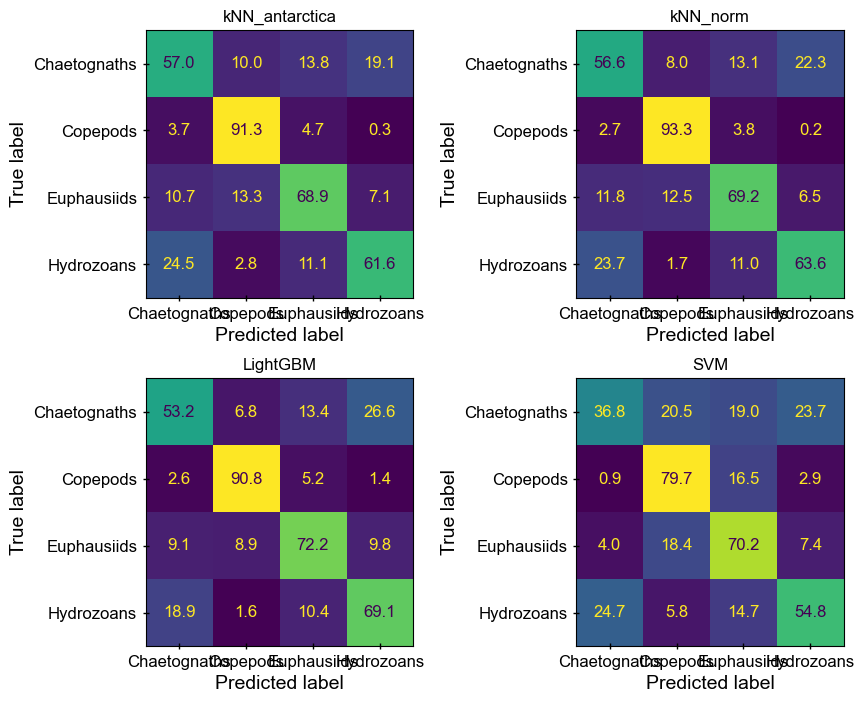

In [22]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
fig.subplots_adjust(hspace=.3, wspace=0.25)
axes = ax.flatten()
labels = ['Chaetognaths', 'Copepods','Euphausiids', 'Hydrozoans']

cmp_kNN = ConfusionMatrixDisplay(kNN_norm_a['cv_df'].Outer_confusion_matrix.mean(),
                             display_labels=labels)
cmp_kNN.plot(ax=axes[0], colorbar=False, values_format='.1f')
axes[0].set_title('kNN_antarctica')

cmp_kNN_a = ConfusionMatrixDisplay(kNN_norm['cv_df'].Outer_confusion_matrix.mean(),
                             display_labels=labels)
cmp_kNN_a.plot(ax=axes[1], colorbar=False, values_format='.1f')
axes[1].set_title('kNN_norm')

cmp_SVM = ConfusionMatrixDisplay(LightGBM['cv_df'].Outer_confusion_matrix.mean(),
                             display_labels=labels)
cmp_SVM.plot(ax=axes[2], colorbar=False, values_format='.1f')
axes[2].set_title('LightGBM')

cmp_LGBM = ConfusionMatrixDisplay(SVM['cv_df'].Outer_confusion_matrix.mean(),
                             display_labels=labels)
cmp_LGBM.plot(ax=axes[3], colorbar=False, values_format='.1f')
axes[3].set_title('SVM')

In [23]:
# Calculate STD
def calculate_confusion_matrix(classifier):
    mean = np.mean(np.vstack(classifier['cv_df'].Outer_confusion_matrix[:]).reshape(500,4,4),axis=0)
    return mean

In [24]:
def calculate_confusion_matrix_sd(classifier):
    sd = np.std(np.vstack(classifier['cv_df'].Outer_confusion_matrix[:]).reshape(500,4,4),axis=0)
    return sd

In [25]:
print(calculate_confusion_matrix(SVM))
print(calculate_confusion_matrix_sd(SVM))

[[36.8 20.5 19.0 23.7]
 [0.9 79.7 16.5 2.9]
 [4.0 18.4 70.2 7.4]
 [24.7 5.8 14.7 54.8]]
[[3.9 3.1 4.9 2.5]
 [1.2 3.0 2.5 1.4]
 [2.1 4.9 4.1 2.6]
 [4.7 2.9 2.6 5.6]]


# Single targets

In [26]:
kNN_norm['predtrackavg_df'].Prediction.value_counts()

Hydrozoan       322
Chaetognaths    242
Euphausiids     197
Copepods         16
Name: Prediction, dtype: int64

In [27]:
def plot_pred(classifier, ax):
    fig,ax = plt.subplots(1,3,figsize=(12,2))
    fig.subplots_adjust(hspace=.3, wspace=0.45)
    axes = ax.flatten()
    k=0
    for pred in ['predSED_df', 'predtrack_df', 'predtrackavg_df']:
        pred_df = classifier[pred]
        axes[k].bar(pred_df.Prediction.value_counts().index,
                pred_df.Prediction.value_counts().values,
                color='k')
    
        axes[1].set_xlabel('Species')
        axes[k].set_title(pred)
        axes[0].set_ylabel('Count')
        k+=1

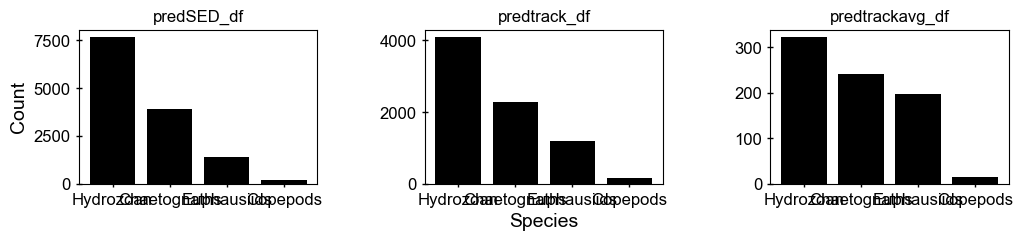

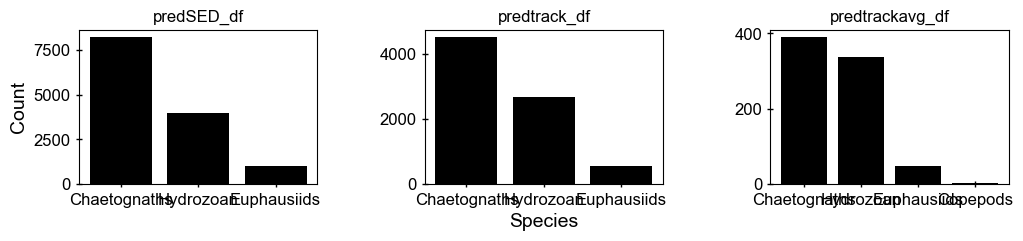

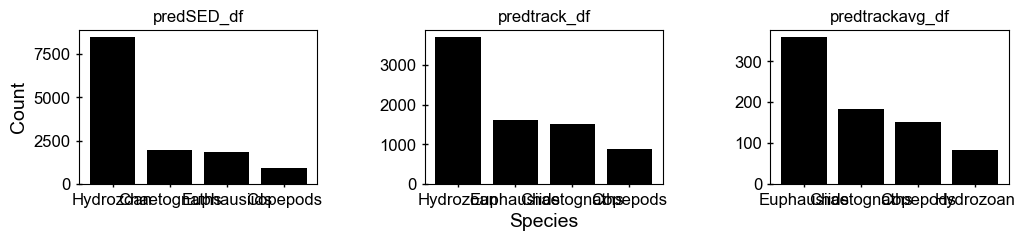

In [28]:
#fig,ax = plt.subplots(2,2,figsize=(10,6))
#fig.subplots_adjust(hspace=.4, wspace=0.3)
#axes = ax.flatten()
plot_pred(kNN_norm, ax=axes[0])
plot_pred(LightGBM, ax=axes[1])
plot_pred(SVM, ax=axes[2])
#plot_pred(LightGBM, ax=axes[3])

In [29]:
species

NameError: name 'species' is not defined

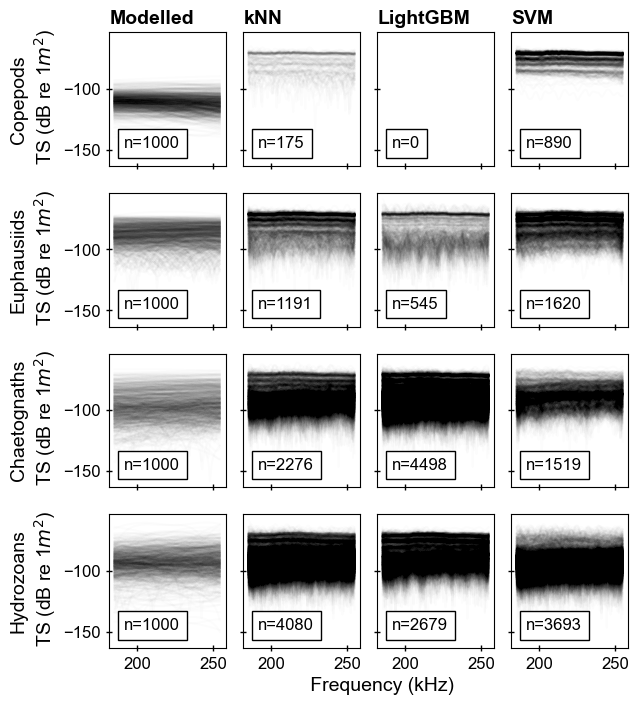

In [30]:
fig, ax = plt.subplots(4, 4, figsize=(two_col,8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=.2, wspace=0.15)
species = model_df.spec.unique()


#model freqs
freqs_all = model_df.columns[:-1].to_numpy()
ind_s = np.where(freqs_all == 185.0)[0][0]
ind_e = np.where(freqs_all == 255.0)[0][0]
freqs_model = freqs_all[ind_s:ind_e]
freqs_model = freqs_model.astype('float64')



for i in range(4):
    spectra_model = model_df[model_df.spec == species[i]].iloc[:,ind_s:ind_e]
    spectra_model = spectra_model.astype('float64')

    ax[i,0].plot(freqs_model,
            spectra_model.T,
            alpha=0.01,
            #label='Modelled',
            color='k')
    at = AnchoredText('n='+ str(np.shape(spectra_model)[0]), loc='lower left')
    ax[i,0].add_artist(at)


    ax[i,0].set_ylabel(species[i]+'\n TS (dB re 1${m^2}$)')

    #if i == len(left_axes):
        #ax.legend()
k=-1
for i_class in [kNN_norm, LightGBM, SVM]:
    
    # SED
    pred_df = i_class['predtrack_df']
    pred_df = pred_df.replace('Hydrozoan', 'Hydrozoans')

    
    freqs_all_pred = pred_df.columns[0:-1].to_numpy()
    ind_s = np.where(freqs_all_pred == '185.000')[0][0]
    ind_e = np.where(freqs_all_pred == '255.000')[0][0]
    freqs = freqs_all_pred[ind_s:ind_e+1]
    freqs = freqs.astype('float64')
    
    k+=1
    for i in range(4):
        spectra = pred_df[pred_df.Prediction == species[i]].iloc[:,ind_s:ind_e+1]
        spectra = spectra.astype('float64')

        ax[i,k+1].plot(freqs,
                spectra.T,
                alpha=0.01,
                #label=name[k],
                color='k')
        at = AnchoredText('n='+str(np.shape(spectra)[0]), loc='lower left')
        ax[i,k+1].add_artist(at)

#axes[0].legend(['PC-DWBA'],fontsize=11, framealpha=0.4, loc='upper right')
#axes[1].legend(fontsize=11, framealpha=0.4, loc='upper right')
ax[0,0].set_title('Modelled', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
ax[0,1].set_title('kNN', fontsize=BIGGER_SIZE, fontweight='bold', loc='left' )
ax[0,2].set_title('LightGBM', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
ax[0,3].set_title('SVM', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')

ax[3,1].set_xlabel('                              Frequency (kHz)')
#axes[7].set_xlabel('Frequency (kHz)')


#for i_ax in range(len(ax)):
    #ax[i_ax].set_rasterized(True)


fig.savefig(savefigs_path+'Figure9_spectra_spag.jpg', format='jpg', dpi = 300, facecolor='w', bbox_inches='tight')

# Tracked single targets

In [31]:
n_meso = 26435
meso_vals = [13380/n_meso, 2485/n_meso, 2220/n_meso, 1000/n_meso]
copepod_vals = [13380, 6310, 710, 160]
copepod_species = ['$\it{Calanus}$ spp.','$\it{Metridia}$ spp.','$\it{Paraeuchaeta}$ spp.','Other']

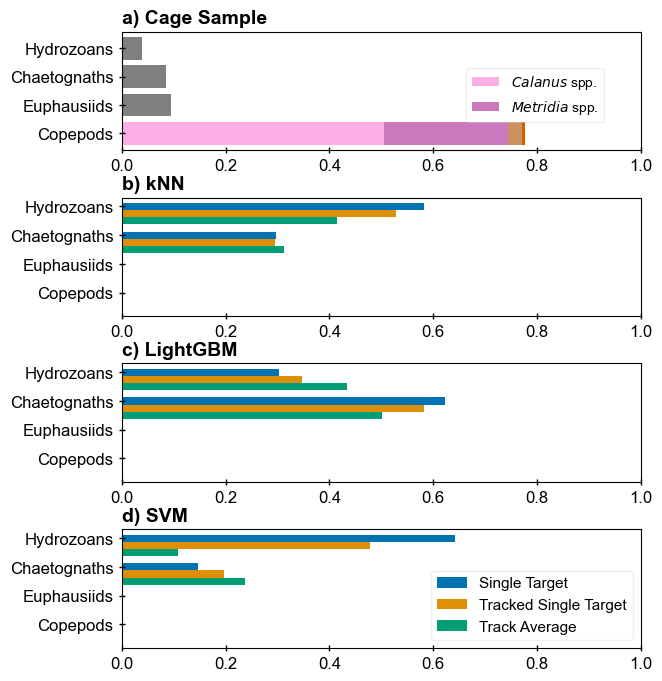

In [32]:
fig, ax = plt.subplots(4,1, figsize=(two_col,8))
fig.subplots_adjust(hspace=.4, wspace=0.3)
axes = ax.flatten()
classifier = [kNN_norm, LightGBM, SVM]

x = np.arange(len(species))

axes[0].barh(x, meso_vals, color='grey')
axes[0].barh(0, (copepod_vals[0]+copepod_vals[1]+copepod_vals[2]+copepod_vals[3])/n_meso, color=palette[3], label=copepod_species[3])
axes[0].barh(0, (copepod_vals[0]+copepod_vals[1]+copepod_vals[2])/n_meso, color=palette[5], label=copepod_species[2])
axes[0].barh(0, (copepod_vals[0]+copepod_vals[1])/n_meso, color=palette[4], label=copepod_species[1])
axes[0].barh(0, copepod_vals[0]/n_meso, label=copepod_species[0], color=palette[6])

axes[0].set_title('a) Cage Sample', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
axes[0].set_yticks(x)
axes[0].set_xlim([0,1])
axes[0].set_yticklabels(species)
axes[0].legend()
handles, labels = axes[0].get_legend_handles_labels()
order = [3,2]
axes[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=10, framealpha=0.3, bbox_to_anchor=(0.65,0.179))


# make space for value arrays in correct species order
trackavg_values = np.zeros((len(species)))
track_values = np.zeros((len(species)))
pred_values = np.zeros((len(species)))

for ind in range(0,3):
    trackavg_df = classifier[ind]['predtrackavg_df']
    trackavg_df = trackavg_df.replace('Hydrozoan', 'Hydrozoans')
    tracked_df = classifier[ind]['predtrack_df']
    tracked_df = tracked_df.replace('Hydrozoan', 'Hydrozoans')
    pred_df = classifier[ind]['predSED_df']
    pred_df = pred_df.replace('Hydrozoan', 'Hydrozoans')
    df = [trackavg_df, tracked_df, pred_df]
    
    for spec_i in order:
        try:
            trackavg_spec = np.where(trackavg_df.Prediction.value_counts().index==species[spec_i])[0][0]
            trackavg_values[spec_i] = trackavg_df.Prediction.value_counts().values[trackavg_spec]
        except:
            trackavg_values[spec_i] = 0 # if species is not detected
        
        try:
            track_spec = np.where(tracked_df.Prediction.value_counts().index==species[spec_i])[0][0]
            track_values[spec_i] = tracked_df.Prediction.value_counts().values[track_spec]
        except:
            track_values[spec_i] = 0
        
        try:
            pred_spec = np.where(pred_df.Prediction.value_counts().index==species[spec_i])[0][0]
            pred_values[spec_i] = pred_df.Prediction.value_counts().values[pred_spec]
        except:
            pred_values[spec_i] = 0
    
    
    axes[ind+1].barh(x, pred_values/n_SED, height=0.25, color=palette[0], label='Single Target')
    axes[ind+1].barh(x-0.25, track_values/nSED_tracked, height=0.25, color=palette[1], label='Tracked Single Target')
    axes[ind+1].barh(x-0.5, trackavg_values/n_tracks, height=0.25, color=palette[2], label='Track Average')

    axes[ind+1].set_xlim([0,1])
    axes[ind+1].set_yticks(x)
    axes[ind+1].set_yticklabels(species)
    
axes[1].set_title('b) kNN', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
axes[2].set_title('c) LightGBM', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
axes[3].set_title('d) SVM', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')

#axes[0].set_xlabel('Proportion of recovered sample')
#axes[3].set_xlabel('Proportion of predicted targets')

axes[3].legend(fontsize=11, framealpha=0.3)
fig.savefig(savefigs_path+'Figure8_sample.jpg', format='jpg', dpi = 300, facecolor='w', bbox_inches='tight')
fig.savefig(savefigs_path+'Figure8_sample.tiff', format='tiff', dpi = 300, facecolor='w', bbox_inches='tight')

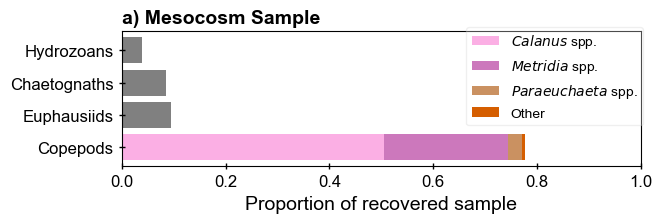

In [33]:
fig, ax = plt.subplots(1,1, figsize=(two_col,1.75))
fig.subplots_adjust(hspace=.4, wspace=0.3)

x = np.arange(len(species))

ax.barh(x, meso_vals, color='grey')
ax.barh(0, (copepod_vals[0]+copepod_vals[1]+copepod_vals[2]+copepod_vals[3])/n_meso, color=palette[3], label=copepod_species[3])
ax.barh(0, (copepod_vals[0]+copepod_vals[1]+copepod_vals[2])/n_meso, color=palette[5], label=copepod_species[2])
ax.barh(0, (copepod_vals[0]+copepod_vals[1])/n_meso, color=palette[4], label=copepod_species[1])
ax.barh(0, copepod_vals[0]/n_meso, label=copepod_species[0], color=palette[6])

ax.set_title('a) Mesocosm Sample', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
ax.set_xlabel('Proportion of recovered sample')
ax.set_yticks(x)
ax.set_xlim([0,1])
ax.set_yticklabels(species)
ax.legend()
handles, labels = ax.get_legend_handles_labels()
order = [3,2,1,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=10, framealpha=0.3, bbox_to_anchor=(0.65,0.25))

fig.savefig(savefigs_path+'Figure8_sampleA.jpg', format='jpg', dpi = 300, facecolor='w', bbox_inches='tight')
fig.savefig(savefigs_path+'Figure8_sampleA.tiff', format='tiff', dpi = 300, facecolor='w', bbox_inches='tight')

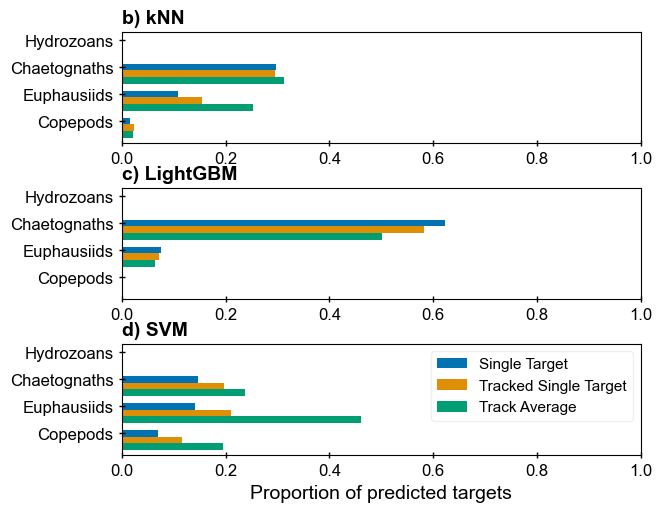

In [47]:
fig, ax = plt.subplots(3,1, figsize=(two_col,5.5))
fig.subplots_adjust(hspace=.4, wspace=0.3)
axes = ax.flatten()
classifier = [kNN_norm, LightGBM, SVM]

# make space for value arrays in correct species order
trackavg_values = np.zeros((len(species)))
track_values = np.zeros((len(species)))
pred_values = np.zeros((len(species)))

for ind in range(0,3):
    trackavg_df = classifier[ind]['predtrackavg_df']
    tracked_df = classifier[ind]['predtrack_df']
    pred_df = classifier[ind]['predSED_df']
    df = [trackavg_df, tracked_df, pred_df]
    
    for spec_i in range(len(species)):
        try:
            trackavg_spec = np.where(trackavg_df.Prediction.value_counts().index==species[spec_i])[0][0]
            trackavg_values[spec_i] = trackavg_df.Prediction.value_counts().values[trackavg_spec]
        except:
            trackavg_values[spec_i] = 0 # if species is not detected
        
        try:
            track_spec = np.where(tracked_df.Prediction.value_counts().index==species[spec_i])[0][0]
            track_values[spec_i] = tracked_df.Prediction.value_counts().values[track_spec]
        except:
            track_values[spec_i] = 0
        
        try:
            pred_spec = np.where(pred_df.Prediction.value_counts().index==species[spec_i])[0][0]
            pred_values[spec_i] = pred_df.Prediction.value_counts().values[pred_spec]
        except:
            pred_values[spec_i] = 0
    
    
    axes[ind].barh(x, pred_values/n_SED, height=0.25, color=palette[0], label='Single Target')
    axes[ind].barh(x-0.25, track_values/nSED_tracked, height=0.25, color=palette[1], label='Tracked Single Target')
    axes[ind].barh(x-0.5, trackavg_values/n_tracks, height=0.25, color=palette[2], label='Track Average')

    axes[ind].set_xlim([0,1])
    axes[ind].set_yticks(x)
    axes[ind].set_yticklabels(species)
    
axes[0].set_title('b) kNN', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
axes[1].set_title('c) LightGBM', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
axes[2].set_title('d) SVM', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')


axes[2].set_xlabel('Proportion of predicted targets')

axes[2].legend(fontsize=11, framealpha=0.3)
fig.savefig(savefigs_path+'Figure8_sample_smooth.jpg', format='jpg', dpi = 300, facecolor='w', bbox_inches='tight')
fig.savefig(savefigs_path+'Figure8_sample_smooth.tiff', format='tiff', dpi = 300, facecolor='w', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


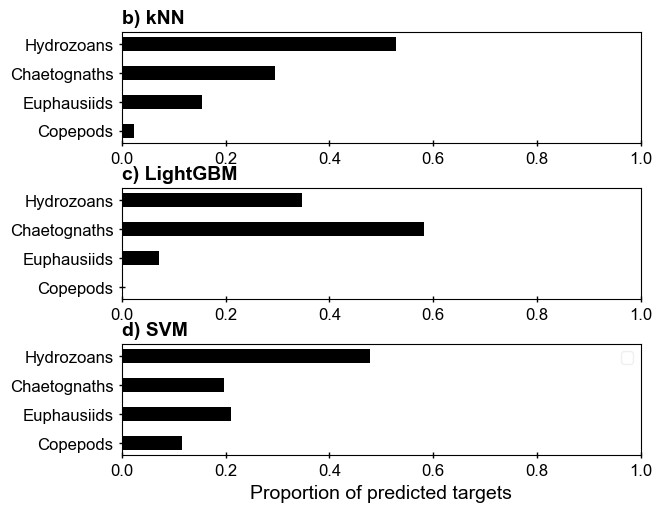

In [50]:
fig, ax = plt.subplots(3,1, figsize=(two_col,5.5))
fig.subplots_adjust(hspace=.4, wspace=0.3)
axes = ax.flatten()
classifier = [kNN_norm, LightGBM, SVM]

# make space for value arrays in correct species order
track_values = np.zeros((len(species)))
pred_values = np.zeros((len(species)))

for ind in range(0,3):
    tracked_df = classifier[ind]['predtrack_df']
    tracked_df = tracked_df.replace('Hydrozoan', 'Hydrozoans')
    pred_df = classifier[ind]['predSED_df']
    pred_df = pred_df.replace('Hydrozoan', 'Hydrozoans')
    df = [trackavg_df, tracked_df, pred_df]
    
    for spec_i in range(len(species)):
        try:
            track_spec = np.where(tracked_df.Prediction.value_counts().index==species[spec_i])[0][0]
            track_values[spec_i] = tracked_df.Prediction.value_counts().values[track_spec]
        except:
            track_values[spec_i] = 0
        
        try:
            pred_spec = np.where(pred_df.Prediction.value_counts().index==species[spec_i])[0][0]
            pred_values[spec_i] = pred_df.Prediction.value_counts().values[pred_spec]
        except:
            pred_values[spec_i] = 0
    
    
    #axes[ind].barh(x, pred_values/n_SED, height=0.3, color=palette[0], label='Single Target')
    axes[ind].barh(x, track_values/nSED_tracked, height=0.5, color='k')#, label='Tracked Single Target')

    axes[ind].set_xlim([0,1])
    axes[ind].set_yticks(x)
    axes[ind].set_yticklabels(species)
    
axes[0].set_title('b) kNN', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
axes[1].set_title('c) LightGBM', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
axes[2].set_title('d) SVM', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')


axes[2].set_xlabel('Proportion of predicted targets')

axes[2].legend(fontsize=11, framealpha=0.3)
fig.savefig(savefigs_path+'Figure8_sample_smooth.jpg', format='jpg', dpi = 300, facecolor='w', bbox_inches='tight')
fig.savefig(savefigs_path+'Figure8_sample_smooth.tiff', format='tiff', dpi = 300, facecolor='w', bbox_inches='tight')

# Track averages

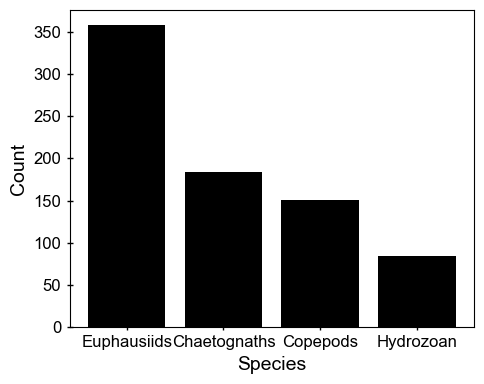

In [55]:
plt.figure(figsize=(5,4))
plt.bar(trackavg_df.Prediction.value_counts().index,
        trackavg_df.Prediction.value_counts().values,
        color='k')
plt.tight_layout()
plt.xlabel('Species')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

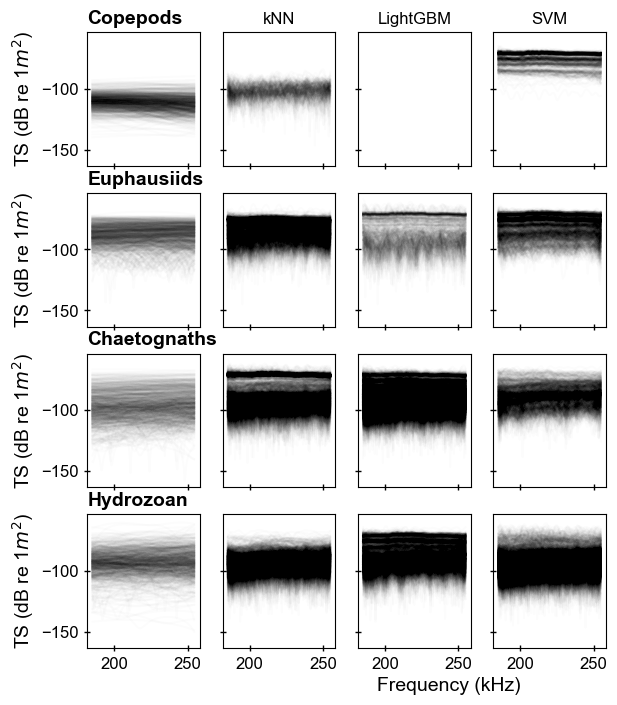

In [72]:
fig, ax = plt.subplots(4, 4, figsize=(two_col,8), sharex=True, sharey=True)
species = model_df.spec.unique()


#model freqs
freqs_all = model_df.columns[:-1].to_numpy()
ind_s = np.where(freqs_all == 185.0)[0][0]
ind_e = np.where(freqs_all == 255.0)[0][0]
freqs_model = freqs_all[ind_s:ind_e]
freqs_model = freqs_model.astype('float64')



for i in range(4):
    spectra_model = model_df[model_df.spec == species[i]].iloc[:,ind_s:ind_e]
    spectra_model = spectra_model.astype('float64')

    ax[i,0].plot(freqs_model,
            spectra_model.T,
            alpha=0.01,
            #label='Modelled',
            color='k')

    ax[i,0].set_title(species[i], fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
    ax[i,0].set_ylabel('TS (dB re 1${m^2}$)')

    #if i == len(left_axes):
        #ax.legend()
k=-1
for i_class in [kNN, LightGBM, SVM]:
    
    # SED
    pred_df = i_class['predtrack_df']

    
    freqs_all_pred = pred_df.columns[:-1].to_numpy()
    ind_s = np.where(freqs_all_pred == '185.000')[0][0]
    ind_e = np.where(freqs_all_pred == '255.000')[0][0]
    freqs = freqs_all_pred[ind_s:ind_e+1]
    freqs = freqs.astype('float64')
    
    name = ['kNN', 'LightGBM', 'SVM']
    color = [0,1,2]
    k+=1
    
    skip = 3
        
    for i in range(4):
        spectra = pred_df[pred_df.Prediction == species[i]].iloc[:,ind_s:ind_e+1]
        spectra = spectra.astype('float64')

        ax[i,k+1].plot(freqs,
                spectra.T,
                alpha=0.01,
                #label=name[k],
                color='k')
    ax[0,k+1].set_title(name[k])

        
#axes[0].legend(['PC-DWBA'],fontsize=11, framealpha=0.4, loc='upper right')
#axes[1].legend(fontsize=11, framealpha=0.4, loc='upper right')

#axes[1].set_title('Single detections', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
#axes[2].set_title('Tracked targets', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')
#axes[3].set_title('Track averages', fontsize=BIGGER_SIZE, fontweight='bold', loc='left')

ax[3,2].set_xlabel('   Frequency (kHz)')
#axes[7].set_xlabel('Frequency (kHz)')


#for i_ax in range(len(ax)):
    #ax[i_ax].set_rasterized(True)


fig.savefig(savefigs_path+'Figure9_spectra_spag.jpg', format='jpg', dpi = 300, facecolor='w', bbox_inches='tight')